# Task 3 Predictive Modeling with Linear Regression (Salary Predictor)

# Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt


# Change directory 

In [2]:
os.chdir('C:\\Users\\Md Adieb\\Task3_Data\\')

In [3]:
os.getcwd()

'C:\\Users\\Md Adieb\\Task3_Data'

# Load Data set

In [4]:
df1= pd.read_csv('Salary_Data.csv')
print (df1)


    YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872


# Create X – Independent Variable ,Create Y – Dependent Variable 

In [5]:
x=df1.iloc[:,:-1]
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [6]:
x=df1.iloc[:,:-1].values
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [7]:
y=df1.iloc[:,-1].values
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

# Plot Graph 

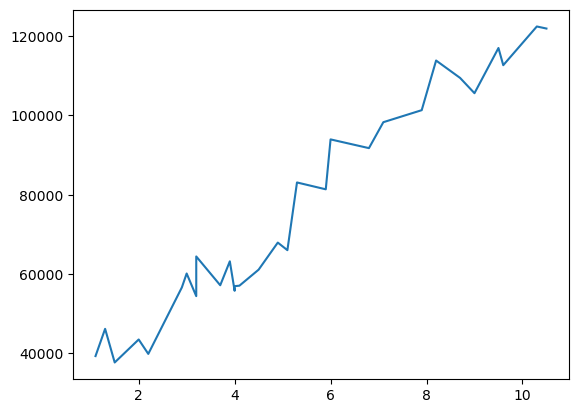

In [8]:
plt.plot(x,y)
plt.show()

# Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
train_test_split(x)#default train test split is 75 and 25 percent

[array([[ 3.2],
        [ 4.5],
        [ 7.9],
        [ 2. ],
        [ 1.3],
        [ 5.3],
        [ 8.7],
        [ 9.5],
        [ 2.2],
        [ 4. ],
        [ 3.2],
        [ 4.9],
        [ 3.7],
        [10.5],
        [ 1.5],
        [ 8.2],
        [ 7.1],
        [ 4. ],
        [ 1.1],
        [ 5.1],
        [ 3. ],
        [ 9. ]]),
 array([[ 6. ],
        [ 6.8],
        [ 4.1],
        [ 9.6],
        [ 3.9],
        [ 2.9],
        [10.3],
        [ 5.9]])]

In [10]:
#80 20 ration split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20)

In [11]:
x_train.shape

(24, 1)

In [12]:
x_test.shape

(6, 1)

In [13]:
y_train.shape

(24,)

In [14]:
y_test.shape

(6,)

# Linear Regression  

In [17]:
#create model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr)

LinearRegression()


# Prediction

In [18]:
y_pred=lr.predict(x_test)
y_pred

array([ 68022.16962733, 102721.94392888,  92405.7948122 ,  38011.55401518,
        73649.16005461, 122416.41042435])

In [19]:
y_test

array([ 61111, 113812,  98273,  46205,  66029, 122391], dtype=int64)

# Display Test , Prediction and Difference  

In [20]:
#display in one line
df_x_test =pd.DataFrame(x_test, columns = ['Experience'])
df_y_test= pd.DataFrame(y_test, columns = ['Salary'])
df_y_test_pred =  pd.DataFrame(y_pred, columns = ['Prediction'])
df_diff =df_y_test- df_y_test_pred
y_test_pred = pd.concat ([df_x_test ,df_y_test, df_y_test_pred ],axis =1)
y_test_pred['Difference'] =df_y_test ['Salary']- df_y_test_pred['Prediction']
print (y_test_pred)

   Experience  Salary     Prediction    Difference
0         4.5   61111   68022.169627  -6911.169627
1         8.2  113812  102721.943929  11090.056071
2         7.1   98273   92405.794812   5867.205188
3         1.3   46205   38011.554015   8193.445985
4         5.1   66029   73649.160055  -7620.160055
5        10.3  122391  122416.410424    -25.410424


# Accuracy 

In [21]:
#accuracy of model
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)
print (accuracy)


0.9317293383563495


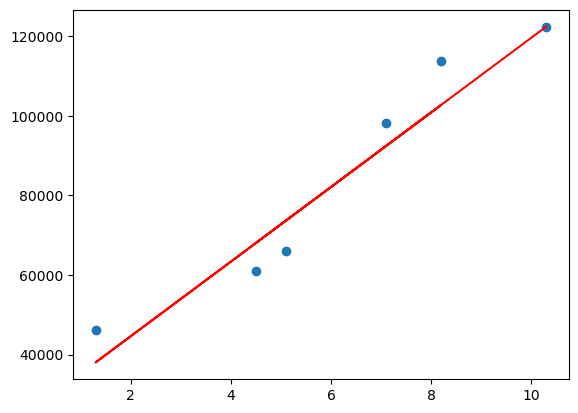

In [22]:
#plot graph
plt.scatter (x_test, y_test)
plt.plot (x_test, y_pred,'r')
plt.show()


# Coefficient and Intercept 

In [23]:
#y=mx+c
lr.coef_#slope

array([9378.3173788])

In [24]:
#intercept
lr.intercept_#c

25819.741422743748

In [25]:
4.0*9598.24847948 +24512.367832881966#y=mx+c

62905.36175080197

In [26]:
print(y_test_pred)

   Experience  Salary     Prediction    Difference
0         4.5   61111   68022.169627  -6911.169627
1         8.2  113812  102721.943929  11090.056071
2         7.1   98273   92405.794812   5867.205188
3         1.3   46205   38011.554015   8193.445985
4         5.1   66029   73649.160055  -7620.160055
5        10.3  122391  122416.410424    -25.410424


In [27]:
y_pred_final= lr.predict (x)
print (y_pred_final)

[ 36135.89053942  38011.55401518  39887.21749094  44576.37618034
  46452.0396561   53016.86182126  53954.69355913  55830.35703489
  55830.35703489  60519.51572429  62395.17920005  63333.01093793
  63333.01093793  64270.84267581  68022.16962733  71773.49657885
  73649.16005461  75524.82353037  81151.81395765  82089.64569553
  89592.29959856  92405.7948122   99908.44871524 102721.94392888
 107411.10261828 110224.59783192 114913.75652132 115851.58825919
 122416.41042435 124292.07390011]


In [28]:
#complete dataset
y_pred_final = pd.DataFrame(y_pred_final,columns= ['Prediction'])
result = pd.concat([df1,y_pred_final], axis =1)
result['Difference'] = result['Salary'] - result['Prediction']
print (result)
result.to_excel("Predictive_LinearRegression.xlsx")


    YearsExperience  Salary     Prediction    Difference
0               1.1   39343   36135.890539   3207.109461
1               1.3   46205   38011.554015   8193.445985
2               1.5   37731   39887.217491  -2156.217491
3               2.0   43525   44576.376180  -1051.376180
4               2.2   39891   46452.039656  -6561.039656
5               2.9   56642   53016.861821   3625.138179
6               3.0   60150   53954.693559   6195.306441
7               3.2   54445   55830.357035  -1385.357035
8               3.2   64445   55830.357035   8614.642965
9               3.7   57189   60519.515724  -3330.515724
10              3.9   63218   62395.179200    822.820800
11              4.0   55794   63333.010938  -7539.010938
12              4.0   56957   63333.010938  -6376.010938
13              4.1   57081   64270.842676  -7189.842676
14              4.5   61111   68022.169627  -6911.169627
15              4.9   67938   71773.496579  -3835.496579
16              5.1   66029   7

In [28]:
from sklearn.metrics import r2_score
accuracy = r2_score(y,y_pred_final)
print (accuracy)


0.9566091663602164


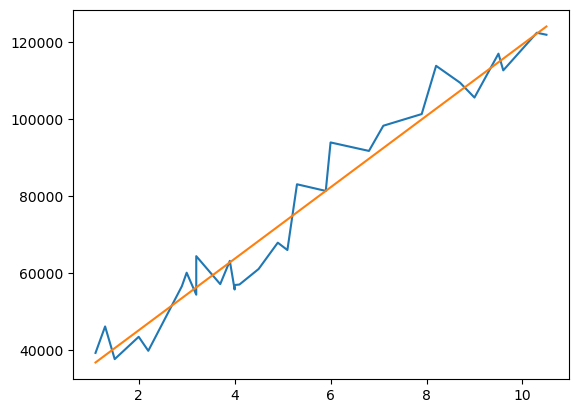

In [29]:
plt.plot(x,y)
plt.plot(x,y_pred_final)
plt.show()

In [30]:
lr.predict([[12]])#2d array

array([137927.0168552])

In [31]:
lr.predict([[15],[12],[5.5]])

array([165742.49800151, 137927.0168552 ,  77660.14103821])